In [1]:
import pandas as pd

In [2]:
import seaborn as sb

In [3]:
import matplotlib.pyplot as plt

In [4]:
A=pd.read_csv("F:/data science workshop/DATA-SET/data/Cars93.csv")

In [5]:
A.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
Unnamed: 0            93 non-null int64
Manufacturer          93 non-null object
Model                 93 non-null object
Type                  93 non-null object
Min.Price             93 non-null float64
Price                 93 non-null float64
Max.Price             93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64


In [7]:
cat=[]
con=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [9]:
from sklearn.preprocessing import Imputer

In [10]:
imp=Imputer()

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
B = pd.DataFrame(imp.fit_transform(A[con].apply(le.fit_transform)),columns=con)

In [13]:
B.head()

,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,0.0,25.0,33.0,36.0,10.0,11.0,5.0,27.0,22.0,67.0,7.0,2.0,18.0,10.0,6.0,5.0,9.0,4.0,24.0
1,1.0,67.0,71.0,73.0,3.0,5.0,15.0,46.0,13.0,37.0,23.0,2.0,36.0,23.0,9.0,6.0,16.0,8.0,60.0
2,2.0,63.0,66.0,63.0,5.0,6.0,13.0,41.0,13.0,32.0,20.0,2.0,21.0,10.0,5.0,5.0,12.0,7.0,50.0
3,3.0,69.0,76.0,76.0,4.0,6.0,13.0,41.0,13.0,52.0,34.0,3.0,34.0,14.0,8.0,5.0,18.0,10.0,52.0
4,4.0,61.0,68.0,69.0,7.0,10.0,18.0,48.0,16.0,54.0,34.0,1.0,27.0,17.0,7.0,7.0,10.0,6.0,64.0


In [14]:
from sklearn_pandas import CategoricalImputer
CI = CategoricalImputer()

In [15]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values="NaN",strategy="most_frequent")

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
C = A[cat].apply(le.fit_transform)

C = pd.DataFrame(imp.fit_transform(C),columns=cat)

In [16]:
 D = B.join(C)


In [18]:
D.head()

,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,...,Weight,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,0.0,25.0,33.0,36.0,10.0,11.0,5.0,27.0,22.0,67.0,...,24.0,0.0,48.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
1,1.0,67.0,71.0,73.0,3.0,5.0,15.0,46.0,13.0,37.0,...,60.0,0.0,55.0,2.0,0.0,1.0,3.0,1.0,1.0,1.0
2,2.0,63.0,66.0,63.0,5.0,6.0,13.0,41.0,13.0,32.0,...,50.0,1.0,8.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0
3,3.0,69.0,76.0,76.0,4.0,6.0,13.0,41.0,13.0,52.0,...,52.0,1.0,0.0,2.0,0.0,1.0,3.0,1.0,1.0,2.0
4,4.0,61.0,68.0,69.0,7.0,10.0,18.0,48.0,16.0,54.0,...,64.0,2.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,4.0


In [21]:
list(A.columns)

['Unnamed: 0',
 'Manufacturer',
 'Model',
 'Type',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Man.trans.avail',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight',
 'Origin',
 'Make']

In [27]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
model = km.fit(A[["Price","MPG.city"]])


In [28]:
model.cluster_centers_


array([[10.73448276, 28.51724138],
       [19.01276596, 20.0212766 ],
       [35.85294118, 18.35294118]])

In [29]:
model.labels_

array([1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1])

In [30]:
Clustered_df = A[["Price","MPG.city"]].join(pd.DataFrame(model.labels_))


In [31]:
Clustered_df

,Price,MPG.city,0
0,15.9,25,1
1,33.9,18,2
2,29.1,20,2
3,37.7,19,2
4,30.0,22,2
...,...,...,...
88,19.7,17,1
89,20.0,21,1
90,23.3,18,1
91,22.7,21,1


In [32]:
c=[]
for i in  model.labels_:
    if(i==0):
        c.append("red")
    elif(i==1):
        c.append("blue")
    else:
        c.append("black")

In [37]:
list(zip(model.labels_,c))


[(1, 'blue'),
 (2, 'black'),
 (2, 'black'),
 (2, 'black'),
 (2, 'black'),
 (1, 'blue'),
 (1, 'blue'),
 (1, 'blue'),
 (1, 'blue'),
 (2, 'black'),
 (2, 'black'),
 (0, 'red'),
 (0, 'red'),
 (1, 'blue'),
 (1, 'blue'),
 (1, 'blue'),
 (1, 'blue'),
 (1, 'blue'),
 (2, 'black'),
 (1, 'blue'),
 (1, 'blue'),
 (2, 'black'),
 (0, 'red'),
 (0, 'red'),
 (1, 'blue'),
 (1, 'blue'),
 (1, 'blue'),
 (1, 'blue'),
 (0, 'red'),
 (1, 'blue'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (1, 'blue'),
 (0, 'red'),
 (1, 'blue'),
 (1, 'blue'),
 (1, 'blue'),
 (0, 'red'),
 (0, 'red'),
 (1, 'blue'),
 (0, 'red'),
 (1, 'blue'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (1, 'blue'),
 (2, 'black'),
 (2, 'black'),
 (2, 'black'),
 (2, 'black'),
 (2, 'black'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (1, 'blue'),
 (2, 'black'),
 (2, 'black'),
 (2, 'black'),
 (1, 'blue'),
 (1, 'blue'),
 (0, 'red'),
 (1, 'blue'),
 (0, 'red'),
 (1, 'blue'),
 (1, 'blue'),
 (1, 'blue'),
 (0, 'red'),
 (1, 'blue'),
 (1, 'blue'),
 (1, 'blue'),
 (1, 'blue'

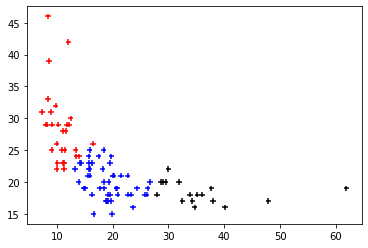

In [39]:
plt.scatter(A.Price,A['MPG.city'],marker="+",s=30,c=c)

In [40]:
WCSS=[]
k = 0
K = []
for i in range(1,10,1):
    from sklearn.cluster import KMeans
    k = k + 1
    K.append(k)
    km = KMeans(n_clusters=i)
    model = km.fit(A[["Price","MPG.city"]])
    WCSS.append(model.inertia_)

In [41]:
list(zip(K,WCSS))  


[(1, 11489.591182795697),
 (2, 5300.007898550724),
 (3, 3074.6626662638637),
 (4, 2169.279461904762),
 (5, 1474.9304180107529),
 (6, 1069.873376344086),
 (7, 792.9270666666666),
 (8, 641.8504201671708),
 (9, 541.7870321779669)]

Text(0.5, 1.0, 'Elbow Curve')

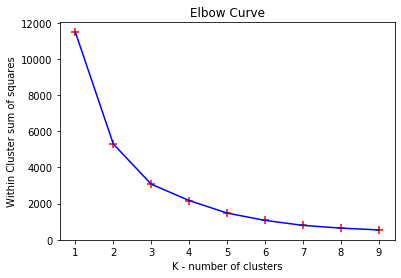

In [42]:
plt.scatter(K,WCSS,marker="+",s=70,c="red")
plt.plot(K,WCSS,c = "blue")
plt.xlabel("K - number of clusters")
plt.ylabel("Within Cluster sum of squares")
plt.title("Elbow Curve")


In [43]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [1]:
# here in model when we print then we know no of iterartions